# Hypothesis Testing with Python


# Recommended Readings:
<ul>
<b><U><li><a href="https://medium.com/@pritul.dave/hypothesis-testing-part-1-p-test-z-test-along-with-real-world-example-c47326954418">Hypotheses Testing: P-Test and Z-Test</a></li>
<li><a href="https://parisrohan.medium.com/what-is-z-test-in-statistics-587b7652b20d">What is Z-Test</a></li>
<li><a href="https://medium.com/@ritusantra/what-is-z-test-and-how-we-implement-it-using-python-d0f92820b4c"> What is Z-test and how we implement it using Python</a></li>
<li><a href="https://blog.devgenius.io/hypothesis-testing-f6162726321a">Hypotheses Testing</a></li>
</U></b>    
</ul>


## Introduction

Hypothesis testing is a fundamental aspect of statistical inference that allows us to make decisions or draw conclusions about a population based on sample data. By performing hypothesis tests, we can determine whether the observed data provide enough evidence to reject a null hypothesis in favor of an alternative hypothesis. This document explains the steps involved in hypothesis testing and provides Python code for conducting both one-sample and two-sample t-tests, including visualizations to help understand the process.


## Steps of Hypothesis Testing

### Step 1: State the Hypotheses

1. **Null Hypothesis (<i>H<sub>0</sub></i>)**: This is the hypothesis that there is no effect or no difference. It is the default assumption.
2. **Alternative Hypothesis (<i>H<sub>a</sub></i>)**: This is the hypothesis that there is an effect or a difference. It is what you aim to support.

**Example:**
- <i>H<sub>0</sub></i>: The mean weight of a population is 70 kg.
- <i>H<sub>a</sub></i>: The mean weight of a population is not 70 kg.


### Step 2: Choose the Significance Level (&alpha;)

The significance level, often denoted by &alpha;, is the probability of rejecting the null hypothesis when it is actually true. Common values are 0.05, 0.01, and 0.10.

**Example:**
- &alpha; = 0.05

### Step 3: Collect the Data

Gather data through experiments or observations.

**Example:**
- Collect a sample of weights from 30 individuals.


### Step 4: Calculate the Test Statistic

Depending on the type of test (t-test, z-test, etc.), calculate the test statistic using the sample data.

**Example (One-sample t-test):**
<div align="center">
    <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} t = \frac{\bar{x} - \mu}{s / \sqrt{n}}" title="t = \frac{\bar{x} - \mu}{s / \sqrt{n}}" />
</div>
where:
- <i>&#x0304;x</i> is the sample mean
- &mu; is the population mean
- s is the sample standard deviation
- n is the sample size

### Step 5: Determine the p-value or Critical Value

Compare the test statistic to a distribution (t-distribution, z-distribution, etc.) to determine the p-value or compare to a critical value.

**Example:**
- Calculate the p-value using the t-distribution with n-1 degrees of freedom.

### Step 6: Make a Decision

- If the p-value < &alpha;, reject the null hypothesis.
- If the p-value &ge; &alpha;, fail to reject the null hypothesis.

**Example:**
- If p-value < 0.05, reject <i>H<sub>0</sub></i>.

<hr>
<hr>
## Visualizing Hypothesis Testing Process with Example Scenarios

### Scenario 1: One-Sample t-Test

**Example:**
- A scientist wants to test if the mean weight of a species of fish is 3 kg.
- Sample data (n=10): [2.8, 3.2, 3.1, 3.0, 2.9, 3.3, 2.7, 3.4, 2.8, 3.0]
- Hypotheses: 
  - <i>H<sub>0</sub></i>: &mu; = 3 kg
  - <i>H<sub>a</sub></i>: &mu; &ne; 3 kg
- Significance level: &alpha; = 0.05


**Steps:**

1. **Calculate the sample mean (<i>&#x0304;x</i>) and standard deviation (s):**
   - <i>&#x0304;x</i> = 3.01
   - s = 0.216

2. **Calculate the test statistic (t):**
   <div align="center">
       <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} t = \frac{3.01 - 3}{0.216 / \sqrt{10}}" title="t = \frac{3.01 - 3}{0.216 / \sqrt{10}}" />
   </div>
   - t = 0.147

3. **Determine the p-value using the t-distribution with 9 degrees of freedom:**
   - p-value = 0.886

4. **Decision:**
   - Since p-value > 0.05, fail to reject <i>H<sub>0</sub></i>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

<hr>

## One-sample t-test
<hr>

In [2]:
# Function for one-sample t-test
def one_sample_t_test(sample, mean, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    t_statistic = (sample_mean - mean) / (sample_std / np.sqrt(n))
    df = n - 1
    p_value = (1 - t.cdf(abs(t_statistic), df)) * 2
    
    print(f"One-Sample t-Test")
    print(f"Sample Mean: {sample_mean}")
    print(f"Sample Std Dev: {sample_std}")
    print(f"t-Statistic: {t_statistic}")
    print(f"Degrees of Freedom: {df}")
    print(f"p-Value: {p_value}")
    
    # Plotting
    x = np.linspace(-4, 4, 1000)
    y = t.pdf(x, df)
    critical_t = t.ppf(1 - alpha / 2, df)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f't-distribution (df={df})')
    plt.axvline(x=t_statistic, color='r', linestyle='--', label='t-statistic')
    plt.axvline(x=critical_t, color='g', linestyle='--', label='Critical value (+)')
    plt.axvline(x=-critical_t, color='g', linestyle='-.', label='Critical value (-)')
    plt.fill_between(x, y, where=abs(x) >= critical_t, color='gray', alpha=0.5)
    plt.legend()
    plt.title('One-Sample t-Test')
    plt.xlabel('t value')
    plt.ylabel('Probability Density')
    plt.show()
    
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")

In [3]:
# Example Data
sample_one = [2.8, 3.2, 3.1, 3.0, 2.9, 3.3, 2.7, 3.4, 2.8, 3.0]

One-Sample t-Test
Sample Mean: 3.02
Sample Std Dev: 0.22997584414213787
t-Statistic: 0.27500954910846365
Degrees of Freedom: 9
p-Value: 0.7895179683300566


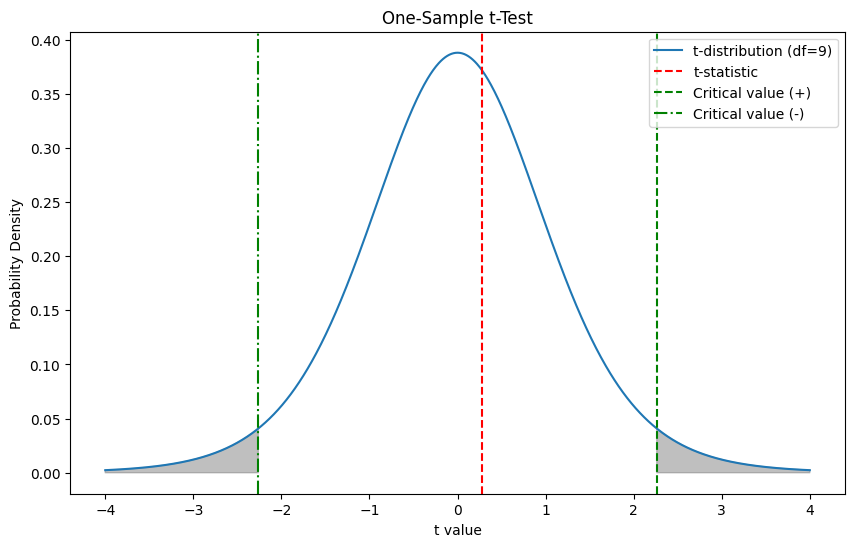

Fail to reject the null hypothesis


In [4]:
# Perform One-Sample t-Test
one_sample_t_test(sample_one, mean=3)

<hr>  

## Two-sample t-test
<hr>

### Scenario 2: Two-Sample t-Test

**Example:**
- A researcher wants to test if there is a difference in mean scores between two groups of students.
- Group A scores: [85, 90, 88, 92, 87]
- Group B scores: [78, 82, 80, 75, 79]
- Hypotheses:
  - <i>H<sub>0</sub></i> : &mu;<sub>A</sub> = &mu;<sub>B</sub>
  - <i>H<sub>a</sub></i> : &mu;<sub>A</sub> &ne; &mu;<sub>B</sub>
- Significance level: &alpha; = 0.05

**Steps:**

1. **Calculate the sample means and standard deviations:**
   - <i>&#x0304;x<sub>A</sub></i> = 88.4, s<sub>A</sub> = 2.88
   - <i>&#x0304;x<sub>B</sub></i> = 78.8, s<sub>B</sub> = 2.77

2. **Calculate the test statistic (t):**
   <div align="center">
       <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} t = \frac{88.4 - 78.8}{\sqrt{\left(\frac{2.88^2}{5}\right) + \left(\frac{2.77^2}{5}\right)}}" title="t = \frac{88.4 - 78.8}{\sqrt{\left(\frac{2.88^2}{5}\right) + \left(\frac{2.77^2}{5}\right)}}" />
   </div>
   
   - t = 7.26

3. **Determine the p-value using the t-distribution with 8 degrees of freedom:**
   - p-value < 0.001

4. **Decision:**
   - Since p-value < 0.05, reject <i>H<sub>0</sub></i>.


In [5]:
# Function for two-sample t-test
def two_sample_t_test(sample1, sample2, alpha=0.05):
    n1, n2 = len(sample1), len(sample2)
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
    df = n1 + n2 - 2
    p_value = (1 - t.cdf(abs(t_statistic), df)) * 2
    
    print(f"Two-Sample t-Test")
    print(f"Sample 1 Mean: {mean1}")
    print(f"Sample 2 Mean: {mean2}")
    print(f"Sample 1 Std Dev: {std1}")
    print(f"Sample 2 Std Dev: {std2}")
    print(f"t-Statistic: {t_statistic}")
    print(f"Degrees of Freedom: {df}")
    print(f"p-Value: {p_value}")
    
    # Plotting
    x = np.linspace(-4, 4, 1000)
    y = t.pdf(x, df)
    critical_t = t.ppf(1 - alpha / 2, df)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f't-distribution (df={df})')
    plt.axvline(x=t_statistic, color='r', linestyle='--', label='t-statistic')
    plt.axvline(x=critical_t, color='g', linestyle='--', label='Critical value (+)')
    plt.axvline(x=-critical_t, color='g', linestyle='-.', label='Critical value (-)')
    plt.fill_between(x, y, where=abs(x) >= critical_t, color='gray', alpha=0.5)
    plt.legend()
    plt.title('Two-Sample t-Test')
    plt.xlabel('t value')
    plt.ylabel('Probability Density')
    plt.show()
    
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")


In [6]:
sample_two_a = [85, 90, 88, 92, 87]
sample_two_b = [78, 82, 80, 75, 79]

Two-Sample t-Test
Sample 1 Mean: 88.4
Sample 2 Mean: 78.8
Sample 1 Std Dev: 2.701851217221259
Sample 2 Std Dev: 2.588435821108957
t-Statistic: 5.737097324805094
Degrees of Freedom: 8
p-Value: 0.00043539410786386235


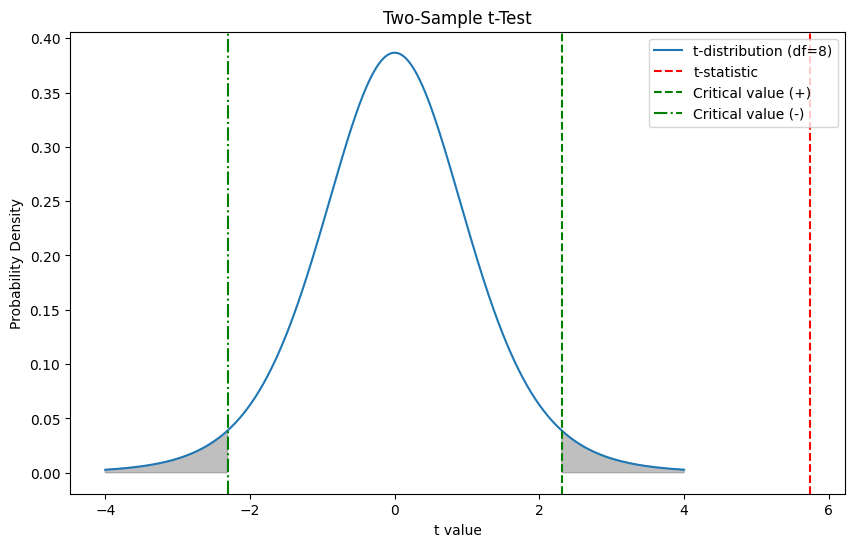

Reject the null hypothesis


In [7]:
# Perform Two-Sample t-Test
two_sample_t_test(sample_two_a, sample_two_b)

## Conclusion

Hypothesis testing is a crucial tool in statistics that helps us make informed decisions based on sample data. By following a systematic process, we can determine whether to reject or fail to reject a null hypothesis. This document has covered the steps involved in hypothesis testing, including formulating hypotheses, choosing a significance level, collecting data, calculating the test statistic, determining the p-value or critical value, and making a decision.

The Python examples provided illustrate how to conduct one-sample and two-sample t-tests, highlighting the calculation of test statistics and p-values, as well as the visualization of results. Understanding these concepts and how to implement them in Python will enhance your ability to perform statistical analyses and draw meaningful conclusions from data.

By mastering hypothesis testing, you gain a powerful method for evaluating hypotheses and making data-driven decisions, which is essential in various fields such as science, business, and engineering.
